# Inaugural Project

> **Note the following:** 
> 1. This is an example of how to structure your **inaugural project**.
> 1. Remember the general advice on structuring and commenting your code
> 1. The `inauguralproject.py` file includes a function which can be used multiple times in this notebook.

Imports and set magics:

In [57]:
import numpy as np

# autoreload modules when code is run. Otherwise, python will not see recent changes. 
%load_ext autoreload
%autoreload 2

# Import your own code 
from inauguralproject import ExchangeEconomyClass
import matplotlib.pyplot as plt

maincolor = 'purple'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Question 1

**Explain how you solve the model**

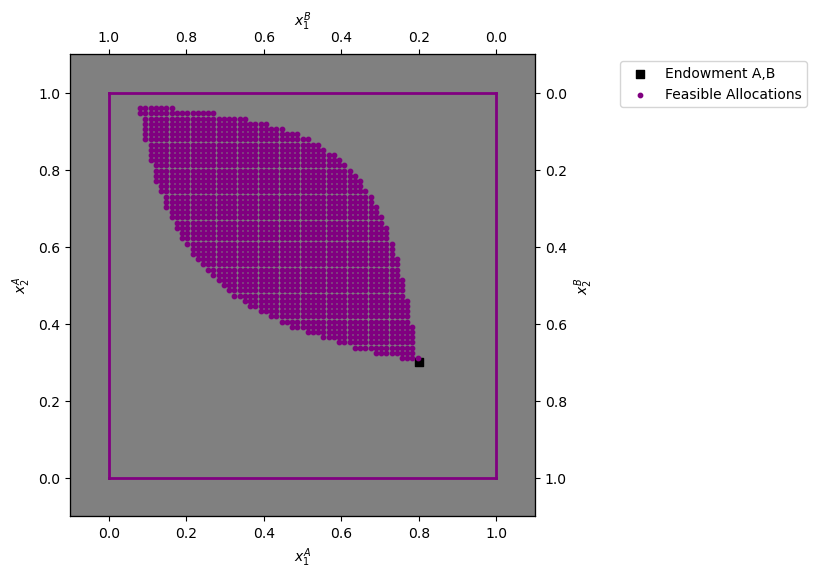

In [74]:

# Create an instance of the ExchangeEconomyClass
economy = ExchangeEconomyClass()

# Calculate utilities at initial endowments
par = economy.par
initial_utility_A = economy.utility_A(par.w1A, par.w2A)
initial_utility_B = economy.utility_B(1 - par.w1A, 1 - par.w2A)

# a. total endowment
w1bar = 1.0
w2bar = 1.0

# Define the number of points in the grid for each good (as specified, N=75)
N = 75
x1A_values = np.linspace(0, w1bar, N)
x2A_values = np.linspace(0, w2bar, N)

# Prepare to store feasible allocations
feasible_x1A = []
feasible_x2A = []

# Check each allocation in the grid
for x1A in x1A_values:
    for x2A in x2A_values:
        # Calculate the utility for both consumers at this allocation
        utility_A = economy.utility_A(x1A, x2A)
        utility_B = economy.utility_B(w1bar - x1A, w2bar - x2A)

        # Check if both utilities are at least as high as with initial endowments
        if utility_A >= initial_utility_A and utility_B >= initial_utility_B:
            feasible_x1A.append(x1A)
            feasible_x2A.append(x2A)

# Set up the figure and axes as provided in your code
fig = plt.figure(frameon=False, figsize=(6, 6), dpi=100)

ax_A = fig.add_subplot(1, 1, 1)
ax_A.set_facecolor('grey')
ax_A.set_xlabel("$x_1^A$")
ax_A.set_ylabel("$x_2^A$")

temp = ax_A.twinx()
temp.set_ylabel("$x_2^B$")
ax_B = temp.twiny()
ax_B.set_xlabel("$x_1^B$")
ax_B.invert_xaxis()
ax_B.invert_yaxis()

# Scatter plot for A's endowment point
ax_A.scatter(par.w1A, par.w2A, marker='s', color='black', label='Endowment A,B')
#ax_B.scatter(1-par.w1A, 1-par.w2A, marker='s', color='brown', label='Endowment B')  # Endowment B is the mirror of A's

# Plot the feasible allocations
ax_A.scatter(feasible_x1A, feasible_x2A, color=maincolor, s=10, label='Feasible Allocations')

# Draw the box representing the limits of the total endowment
ax_A.plot([0, w1bar], [0, 0], lw=2, color=maincolor)
ax_A.plot([0, w1bar], [w2bar, w2bar], lw=2, color=maincolor)
ax_A.plot([0, 0], [0, w2bar], lw=2, color=maincolor)
ax_A.plot([w1bar, w1bar], [0, w2bar], lw=2, color=maincolor)

ax_A.set_xlim([-0.1, w1bar + 0.1])
ax_A.set_ylim([-0.1, w2bar + 0.1])
ax_B.set_xlim([w1bar + 0.1, -0.1])
ax_B.set_ylim([w2bar + 0.1, -0.1])

# Legend
ax_A.legend(frameon=True, loc='upper right', bbox_to_anchor=(1.6, 1.0))

# Show the plot
plt.show()


# Question 2

Explain your code and procedure

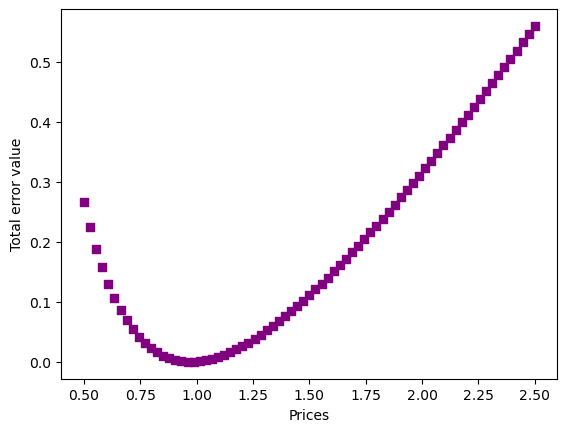

In [75]:
p_values = np.linspace(0.5, 2.5, N)
ErrorList = []

for price in p_values:
   error1, error2 = economy.check_market_clearing(price)
   total_error = error1+error2
   ErrorList.append(total_error)

plt.scatter(p_values, ErrorList, marker='s', color=maincolor)
plt.xlabel('Prices')
plt.ylabel('Total error value')
plt.show()


# Question 3

Explain your code and procedure

In [66]:
min_error = min(ErrorList)
min_error_index = ErrorList.index(min_error)
optimal_price = p_values[min_error_index]
print(optimal_price)

0.9594594594594594


ADD CONCISE CONLUSION.